In [7]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_validate
import numpy as np
import pandas as pd
# Import and read dataset
df = pd.read_csv('E:/Portofolio Randa/Fuel Consumption/dataset/fuel_data.csv')
df.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [2]:
result = df[(df['ENGINE SIZE'] == 2.0) & (df['CYLINDERS'] == 6) & 
            (df['TRANSMISSION'] == 'A4') & (df['FUEL'] == 'X')]
result

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [4]:
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


In [5]:
df = df.rename(columns = {'HWY (L/100 km)': 'HWY', 'COMB (L/100 km)': 'COMB','COMB (mpg)':'COMB_mpg'}, inplace = False)
df.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY,COMB,COMB_mpg,EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [6]:
numerical =  df.select_dtypes(include=[np.number])
numerical.columns

Index(['YEAR', 'ENGINE SIZE', 'CYLINDERS', 'FUEL CONSUMPTION', 'HWY', 'COMB',
       'COMB_mpg', 'EMISSIONS'],
      dtype='object')

In [7]:
categorical = df.select_dtypes(exclude=[np.number])
categorical.columns

Index(['MAKE', 'MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL'], dtype='object')

In [8]:
all_values = df['MAKE'].tolist()

# Convert all values to lowercase
lower_values = [x.lower() for x in all_values]

# Check if there are any duplicates in the lowercase values
duplicates = set([x for x in lower_values if lower_values.count(x) > 1])

# Print the result
if duplicates:
    print("Found duplicate values:", duplicates)
else:
    print("No duplicate values found.")


Found duplicate values: {'ram', 'plymouth', 'dodge', 'daewoo', 'chevrolet', 'chrysler', 'isuzu', 'mercedes-benz', 'buick', 'lamborghini', 'oldsmobile', 'smart', 'srt', 'pontiac', 'toyota', 'kia', 'saturn', 'suzuki', 'lexus', 'fiat', 'bugatti', 'bentley', 'hummer', 'alfa romeo', 'aston martin', 'scion', 'infiniti', 'rolls-royce', 'acura', 'audi', 'mazda', 'jaguar', 'volkswagen', 'lincoln', 'mini', 'genesis', 'gmc', 'hyundai', 'ferrari', 'mitsubishi', 'subaru', 'maserati', 'saab', 'jeep', 'nissan', 'bmw', 'volvo', 'cadillac', 'honda', 'land rover', 'porsche', 'ford'}


In [9]:
df['MAKE'] = df['MAKE'].apply(lambda x: x.upper() if x.lower() in duplicates else x)
df.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [10]:
df.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [11]:
df['FUEL'] = df['FUEL'].replace({'X': 'Regular gasoline'})
df['FUEL'] = df['FUEL'].replace({'Z': 'Premium gasoline'})
df['FUEL'] = df['FUEL'].replace({'D': 'Diesel'})
df['FUEL'] = df['FUEL'].replace({'E': 'Ethanol (E85)'})
df['FUEL'] = df['FUEL'].replace({'N': 'Natural Gas'})

In [12]:
df.head(5)

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,Regular gasoline,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,Regular gasoline,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Premium gasoline,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Premium gasoline,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,Regular gasoline,10.0,7.0,8.6,33,198


      EMISSIONS
YEAR           
2000     165946
2001     174436
2002     194942
2003     214043
2004     235161
2005     263851
2006     248492
2007     267481
2008     273824
2009     274467
2010     248520
2011     258385
2012     255003
2013     240153
2014     231302
2015     279571
2016     275462
2017     264420
2018     270791
2019     265351
2020     246648
2021     243889
2022     248406


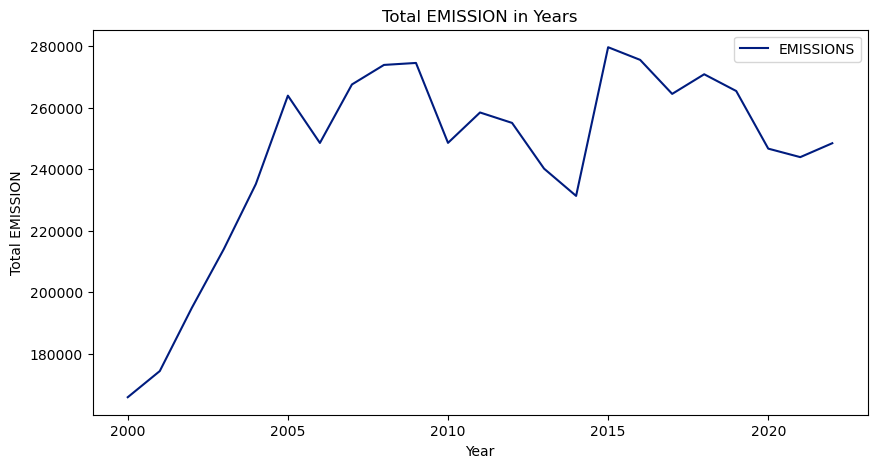

In [10]:
grouped_df = df[['YEAR', 'EMISSIONS']].groupby('YEAR').sum()
data = grouped_df
print(data)
sns.set_palette('dark')
grouped_df.plot(kind='line', figsize=(10, 5))
plt.title('Total EMISSION in Years')
plt.xlabel('Year')
plt.ylabel('Total EMISSION')
plt.show()

      FUEL CONSUMPTION
YEAR                  
2000            8390.7
2001            8837.1
2002            9959.4
2003           10914.6
2004           12049.7
2005           13555.1
2006           12742.3
2007           13916.1
2008           14208.1
2009           14361.8


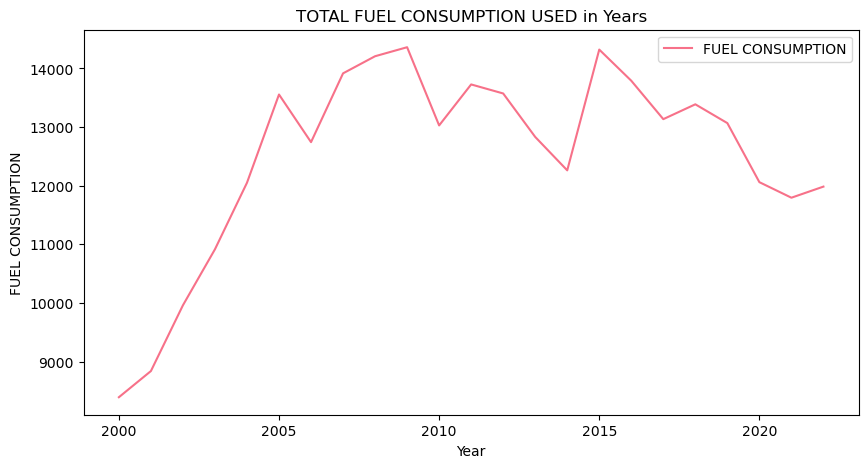

In [11]:
grouped_df = df[['YEAR', 'FUEL CONSUMPTION']].groupby('YEAR').sum()
data = grouped_df[:10]
print(data)
sns.set_palette('husl')
grouped_df.plot(kind='line', figsize=(10, 5))
plt.title('TOTAL FUEL CONSUMPTION USED in Years')
plt.xlabel('Year')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

               FUEL CONSUMPTION
MAKE                           
CHEVROLET               30569.8
FORD                    23393.0
GMC                     21967.6
BMW                     18968.5
MERCEDES-BENZ           17509.0
DODGE                   14011.4
PORSCHE                 12634.4
TOYOTA                  10655.2
AUDI                    10060.0
NISSAN                   8794.9


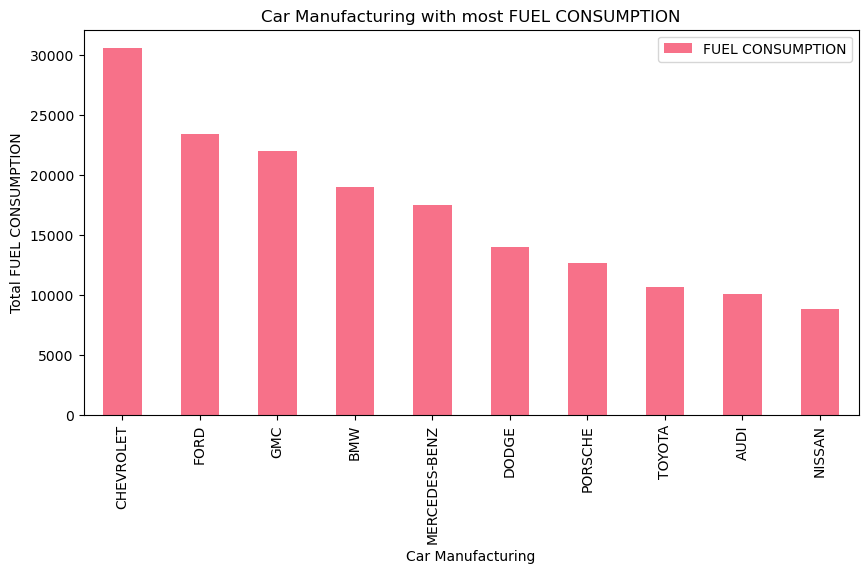

In [12]:
grouped_df = df[['MAKE', 'FUEL CONSUMPTION']].groupby('MAKE').sum()
grouped_df = grouped_df.sort_values(by='FUEL CONSUMPTION', ascending=False)
num_rows = grouped_df.shape[0]

# # Print the result
# print("Number of rows:", num_rows)
# print(grouped_df)

data = grouped_df[:10]
print(data)
sns.set_palette('husl')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Car Manufacturing with most FUEL CONSUMPTION')
plt.xlabel('Car Manufacturing')
plt.ylabel('Total FUEL CONSUMPTION')
plt.show()

               EMISSIONS
MAKE                    
CHEVROLET         575099
FORD              449399
GMC               409644
BMW               373670
MERCEDES-BENZ     348693
DODGE             261882
PORSCHE           253001
TOYOTA            219978
AUDI              199314
NISSAN            179409


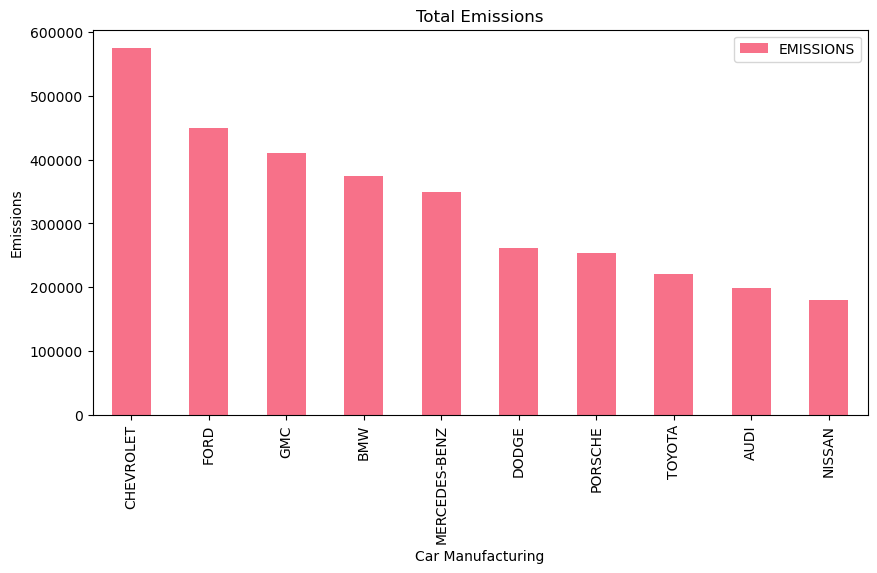

In [13]:
grouped_df = df[['MAKE', 'EMISSIONS']].groupby('MAKE').sum()
grouped_df = grouped_df.sort_values(by='EMISSIONS', ascending=False)
# print(grouped_df)
data = grouped_df[:10]
print(data)
sns.set_palette('husl')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Total Emissions')
plt.xlabel('Car Manufacturing')
plt.ylabel('Emissions')
plt.show()

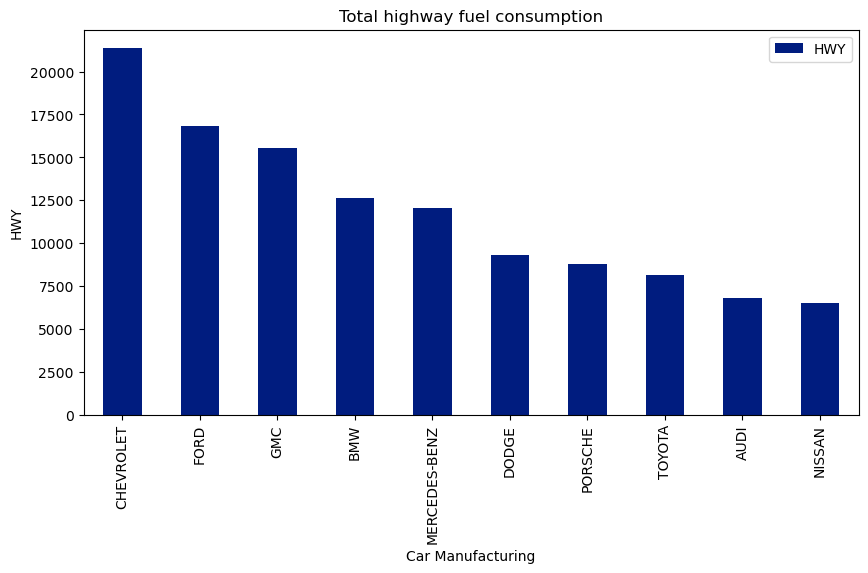

In [14]:
grouped_df = df[['MAKE', 'HWY']].groupby('MAKE').sum()
grouped_df = grouped_df.sort_values(by='HWY', ascending=False)
# print(grouped_df)

data = grouped_df[:10]

sns.set_palette('dark')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Total highway fuel consumption')
plt.xlabel('Car Manufacturing')
plt.ylabel('HWY')
plt.show()

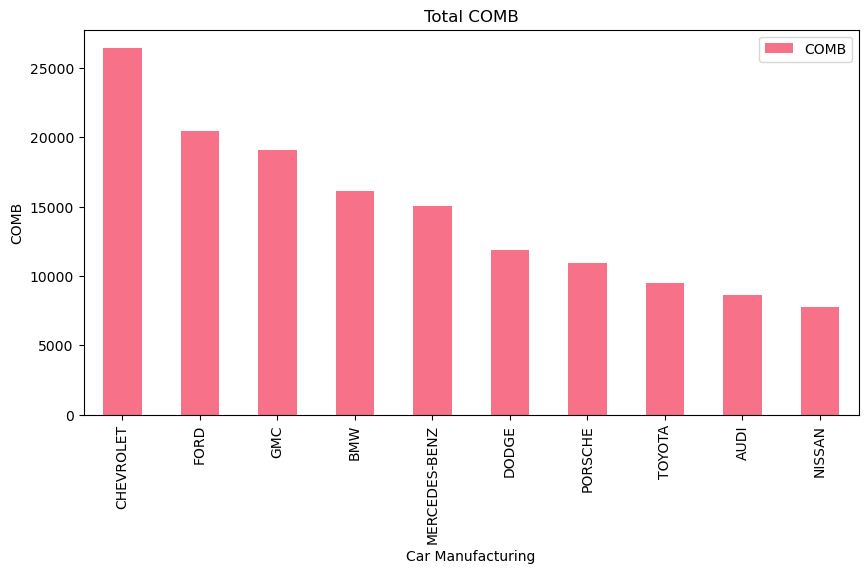

In [15]:
grouped_df = df[['MAKE', 'COMB']].groupby('MAKE').sum()
grouped_df = grouped_df.sort_values(by='COMB', ascending=False)
# print(grouped_df)

data = grouped_df[:10]

sns.set_palette('husl')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Total COMB')
plt.xlabel('Car Manufacturing')
plt.ylabel('COMB')
plt.show()

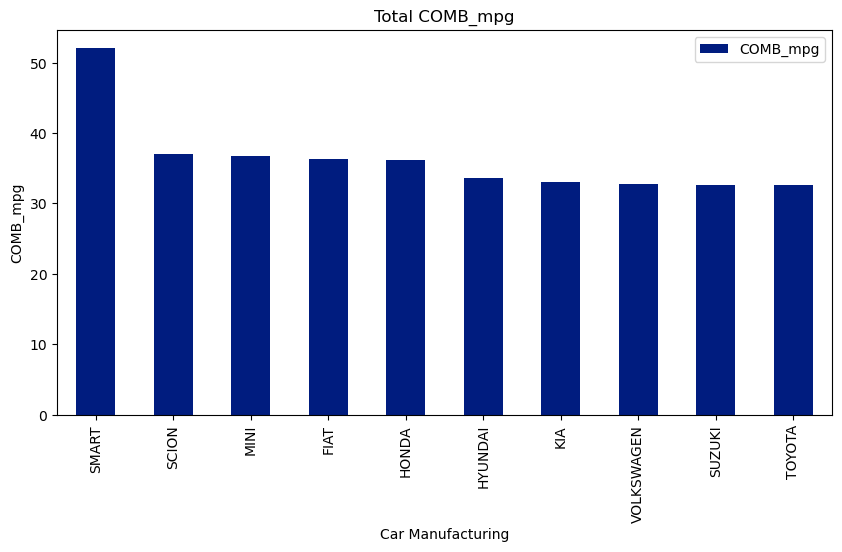

In [16]:
grouped_df = df[['MAKE', 'COMB_mpg']].groupby('MAKE').mean()
grouped_df = grouped_df.sort_values(by='COMB_mpg', ascending=False)
# print(grouped_df)

data = grouped_df[:10]

sns.set_palette('dark')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Total COMB_mpg')
plt.xlabel('Car Manufacturing')
plt.ylabel('COMB_mpg')
plt.show()

               FUEL CONSUMPTION
VEHICLE CLASS                  
COMPACT                 28218.8
Compact                  5104.2
FULL-SIZE               15037.9
Full-size                5375.5
MID-SIZE                26508.6
MINICOMPACT              9210.4
MINIVAN                  4931.0
Mid-size                 7271.8
Minicompact              2622.3
Minivan                   528.0


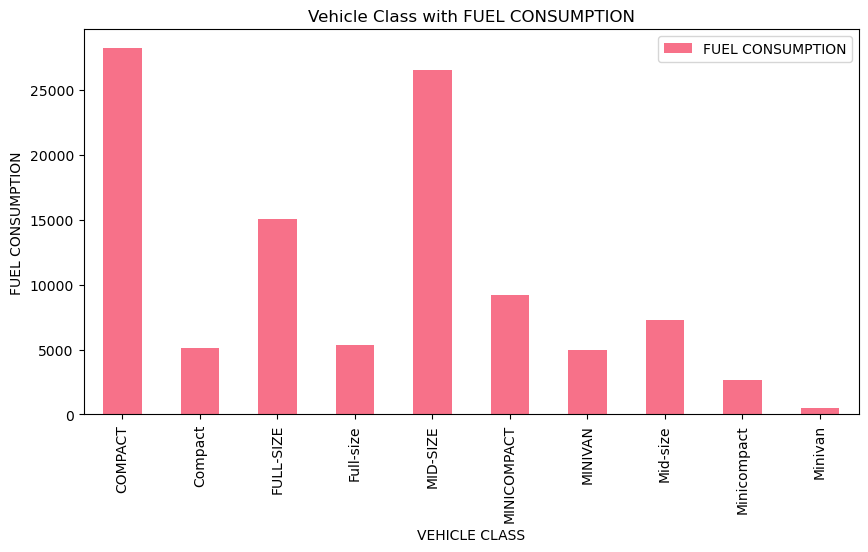

In [17]:
grouped_df = df[['VEHICLE CLASS', 'FUEL CONSUMPTION']].groupby('VEHICLE CLASS').sum()
data = grouped_df[:10]
print(data)
sns.set_palette('husl')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Vehicle Class with FUEL CONSUMPTION')
plt.xlabel('VEHICLE CLASS')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

              FUEL CONSUMPTION
TRANSMISSION                  
A10                     2392.4
A3                       328.4
A4                     49958.1
A5                     20033.3
A6                     28736.6
A7                      3794.8
A8                     11027.7
A9                      6542.9
AM5                       36.8
AM6                     2073.8


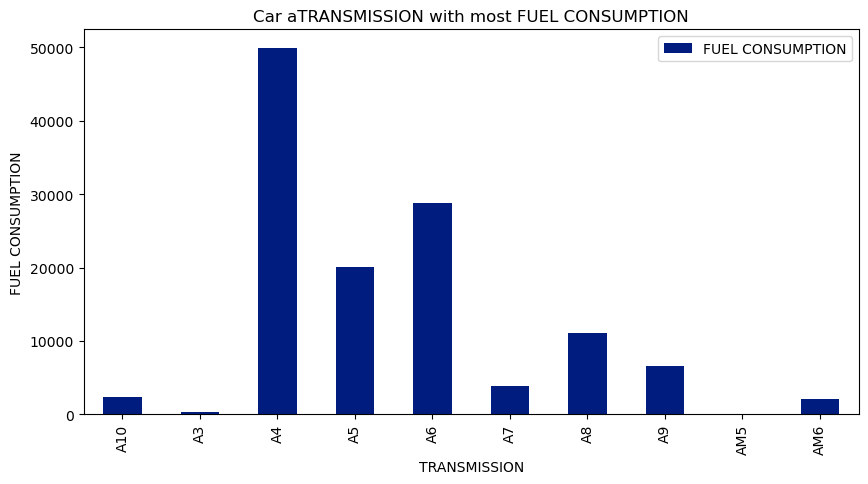

In [18]:
grouped_df = df[['TRANSMISSION', 'FUEL CONSUMPTION']].groupby('TRANSMISSION').sum()
data = grouped_df[:10]
print(data)
sns.set_palette('dark')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Car aTRANSMISSION with most FUEL CONSUMPTION')
plt.xlabel('TRANSMISSION')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

      FUEL CONSUMPTION
FUEL                  
D               3054.5
E              20897.7
N                627.8
X             140663.5
Z             122650.3


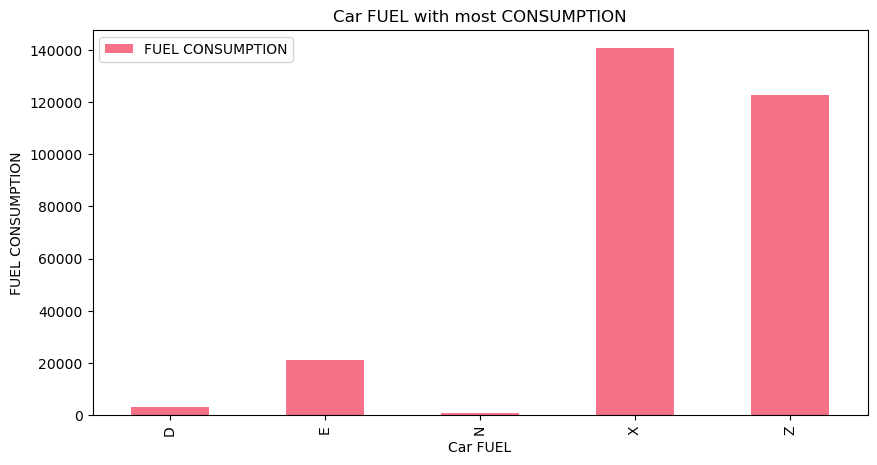

In [19]:
grouped_df = df[['FUEL', 'FUEL CONSUMPTION']].groupby('FUEL').sum()
data = grouped_df[:10]
print(data)
sns.set_palette('husl')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Car FUEL with most CONSUMPTION')
plt.xlabel('Car FUEL')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

               FUEL CONSUMPTION
MODEL                          
MUSTANG                  1134.3
SILVERADO                 918.5
SIERRA                    918.5
JETTA                     886.0
F150                      846.8
RAM 1500                  787.0
RANGER                    776.5
SILVERADO 4WD             750.3
SIERRA 4WD                750.3
F150 4X4                  742.9


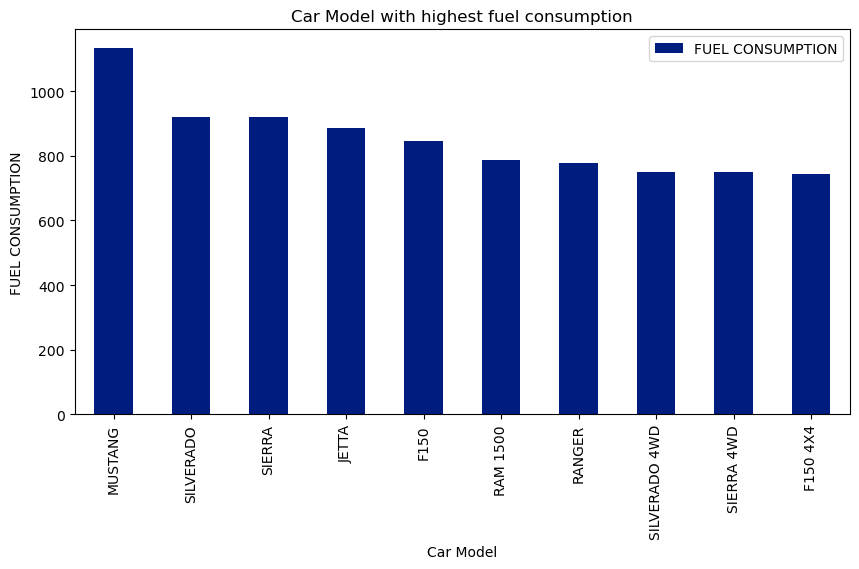

In [20]:
grouped_df = df[['MODEL', 'FUEL CONSUMPTION']].groupby('MODEL').sum()
grouped_df = grouped_df.sort_values(by='FUEL CONSUMPTION', ascending=False)
# print(grouped_df)
data = grouped_df[:10]
print(data)
sns.set_palette('dark')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Car Model with highest fuel consumption')
plt.xlabel('Car Model')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

           FUEL CONSUMPTION
CYLINDERS                  
2                     207.0
3                    1251.1
4                   78627.1
5                    5897.1
6                  104087.4
8                   85581.0
10                   2993.1
12                   8918.2
16                    331.8


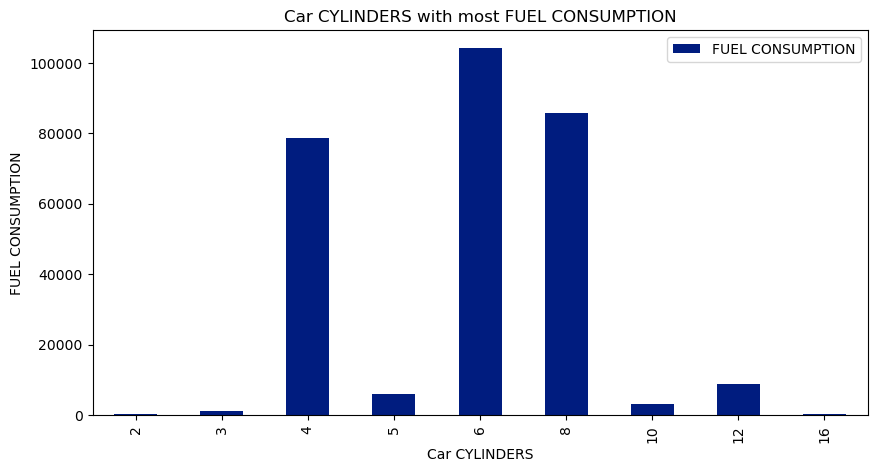

In [21]:

grouped_df = df[['CYLINDERS', 'FUEL CONSUMPTION']].groupby('CYLINDERS').sum()
data = grouped_df[:10]
print(data)
sns.set_palette('dark')
data.plot(kind='bar', figsize=(10, 5))
plt.title('Car CYLINDERS with most FUEL CONSUMPTION')
plt.xlabel('Car CYLINDERS')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

             FUEL CONSUMPTION
ENGINE SIZE                  
0.8                      13.8
0.9                      22.0
1.0                     255.4
1.2                     245.4
1.3                     600.2
...                       ...
6.8                     461.8
7.0                     114.0
8.0                     454.2
8.3                     219.0
8.4                     231.7

[63 rows x 1 columns]


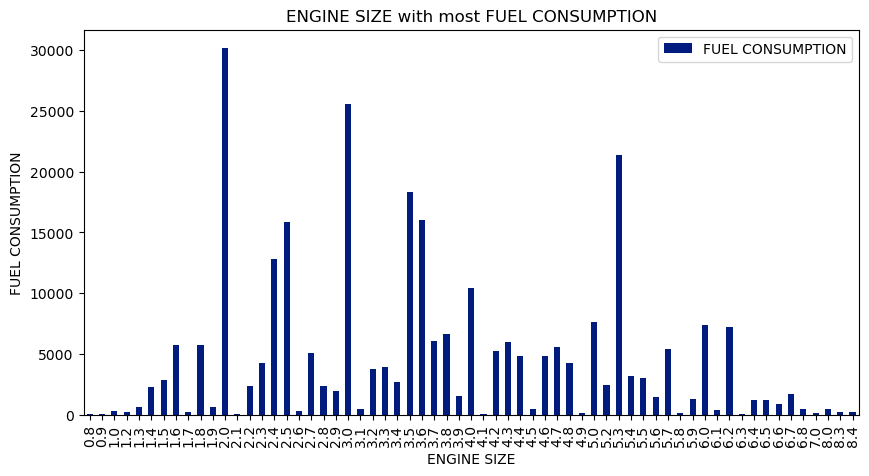

In [22]:

grouped_df = df[['ENGINE SIZE', 'FUEL CONSUMPTION']].groupby('ENGINE SIZE').sum()
data = grouped_df[:10]
print(data)
sns.set_palette('dark')
data.plot(kind='bar', figsize=(10, 5))
plt.title('ENGINE SIZE with most FUEL CONSUMPTION')
plt.xlabel('ENGINE SIZE')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

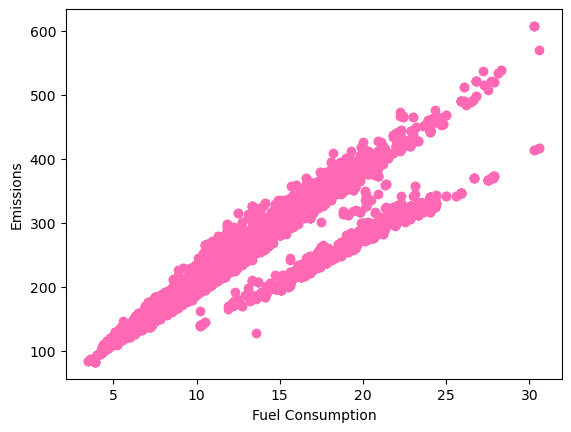

In [23]:
x=df['FUEL CONSUMPTION']
y=df['EMISSIONS']
plt.scatter(x,y,color = 'hotpink')

# Add labels to the x and y axes
plt.xlabel('Fuel Consumption')
plt.ylabel('Emissions')

# Show the plot
plt.show()


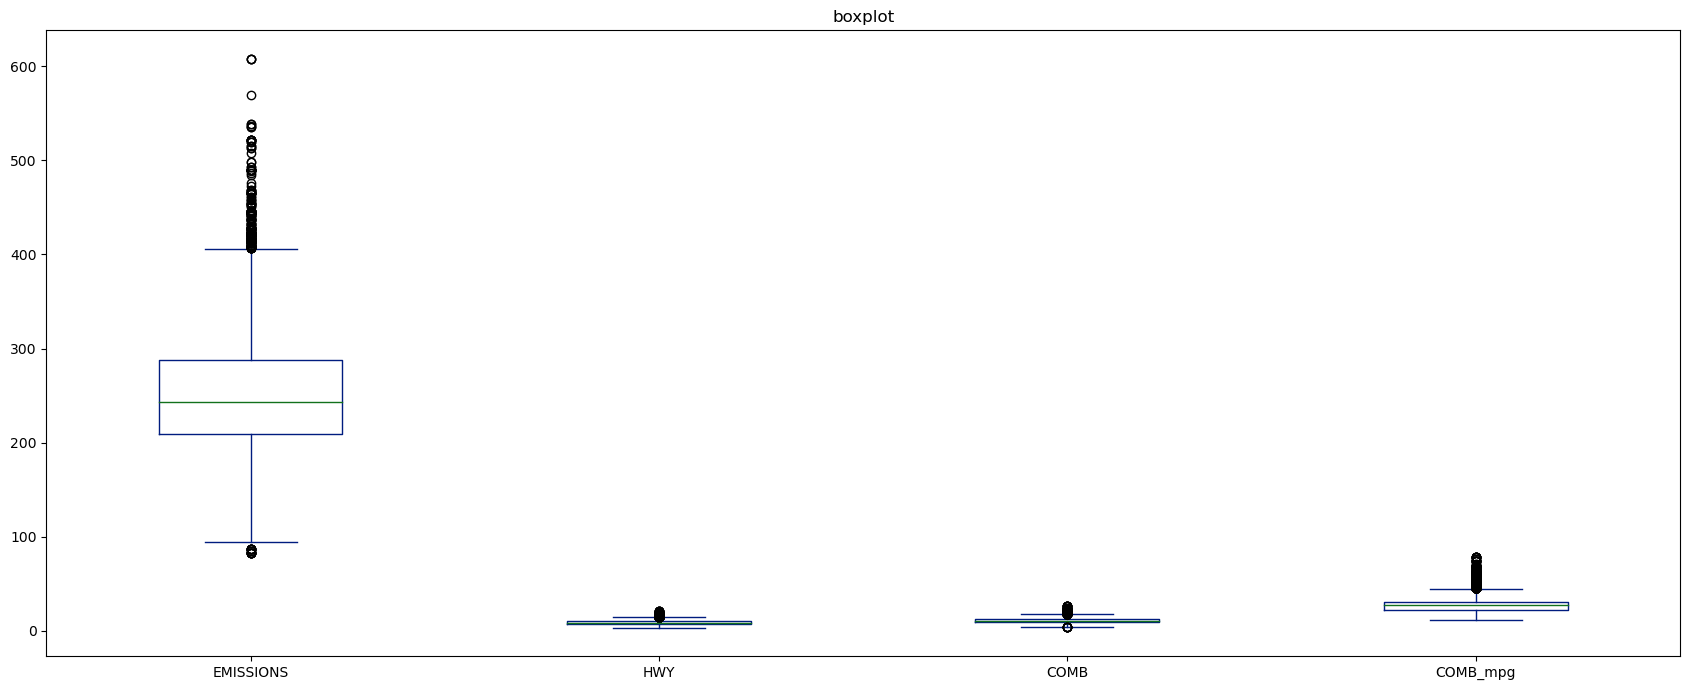

In [24]:
import plotly.express as px

plt.rcParams["figure.figsize"] = [17, 7]
plt.rcParams["figure.autolayout"] = True
ax = df[['EMISSIONS','HWY','COMB','COMB_mpg']].plot(kind='box', title='boxplot')
plt.show()

In [25]:
df.corr()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY,COMB,COMB_mpg,EMISSIONS
YEAR,1.000000,-0.077782,-0.072607,-0.098631,-0.007471,-0.068020,0.079989,-0.047869
ENGINE SIZE,-0.077782,1.000000,0.913377,0.821605,0.749394,0.807316,-0.755002,0.821285
CYLINDERS,-0.072607,0.913377,1.000000,0.794943,0.698344,0.771587,-0.714215,0.802176
FUEL CONSUMPTION,-0.098631,0.821605,0.794943,1.000000,0.942351,0.992960,-0.921361,0.919101
HWY,-0.007471,0.749394,0.698344,0.942351,1.000000,0.975014,-0.884744,0.894781
COMB,-0.068020,0.807316,0.771587,0.992960,0.975014,1.000000,-0.920915,0.922983
COMB_mpg,0.079989,-0.755002,-0.714215,-0.921361,-0.884744,-0.920915,1.000000,-0.901844
EMISSIONS,-0.047869,0.821285,0.802176,0.919101,0.894781,0.922983,-0.901844,1.000000


<AxesSubplot:>

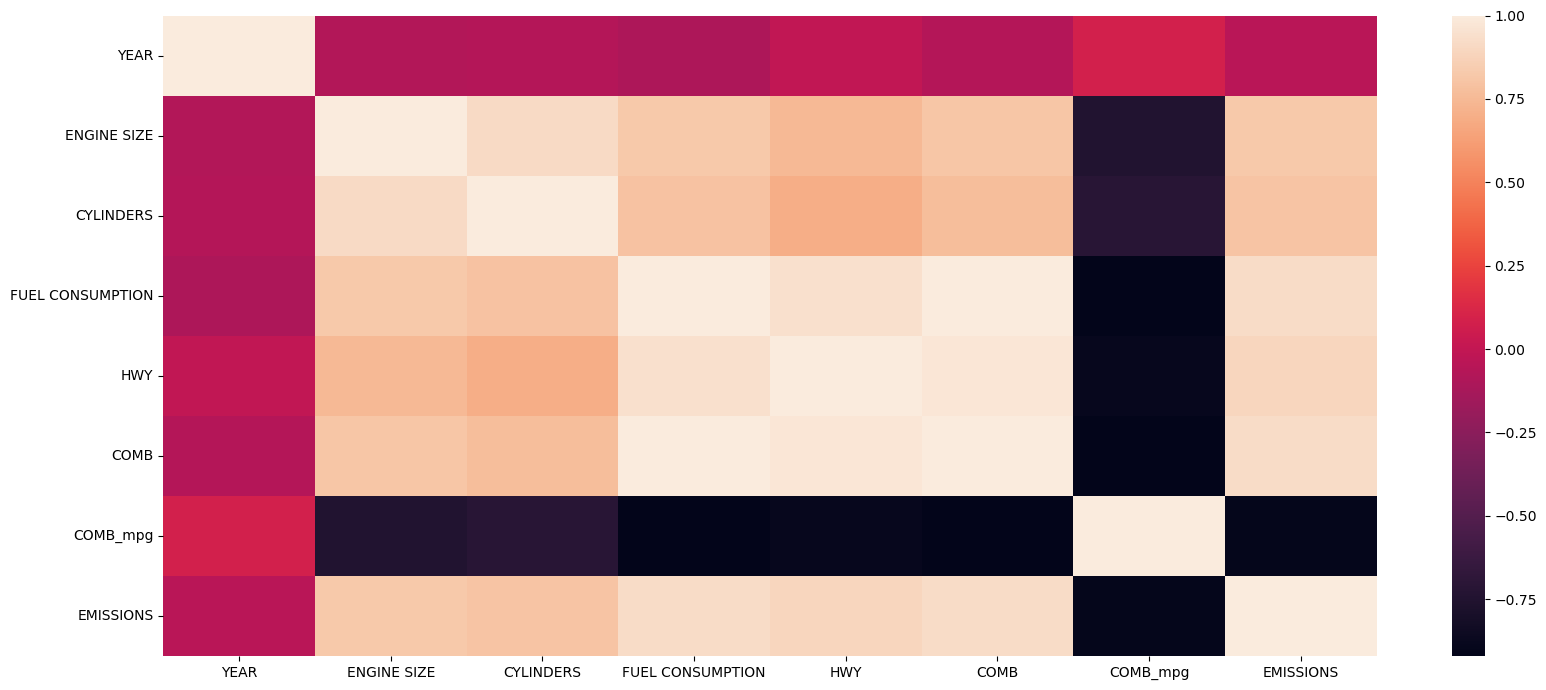

In [26]:
sns.heatmap(df.corr())

In [27]:
# Checking if any rows are missing any data.
df.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY                 0
COMB                0
COMB_mpg            0
EMISSIONS           0
dtype: int64

In [28]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22551    False
22552    False
22553    False
22554    False
22555    False
Length: 22556, dtype: bool

In [29]:
# Determine count of unique values for each column in the dataframe
df.nunique()

YEAR                  23
MAKE                  52
MODEL               4242
VEHICLE CLASS         32
ENGINE SIZE           63
CYLINDERS              9
TRANSMISSION          30
FUEL                   5
FUEL CONSUMPTION     228
HWY                  152
COMB                 192
COMB_mpg              59
EMISSIONS            358
dtype: int64

In [30]:
print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(df)}')
filtered_entries = np.array([True] * len(df))
for col in['EMISSIONS','HWY','COMB','COMB_mpg']:
    
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1

    min_IQR = q1 - (1.5 * iqr)
    max_IQR = q3 + (1.5 * iqr)

    filtered_entries=((df[col]>=min_IQR) & (df[col]<=max_IQR)) & filtered_entries
    df=df[filtered_entries]

print(f'Jumlah Baris Sebelum Outlier Dihapus: {len(df)}')

Jumlah Baris Sebelum Outlier Dihapus: 22556
Jumlah Baris Sebelum Outlier Dihapus: 21347


C:\Users\Acer\AppData\Local\Temp\ipykernel_9128\1638485643.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[filtered_entries]
C:\Users\Acer\AppData\Local\Temp\ipykernel_9128\1638485643.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[filtered_entries]
C:\Users\Acer\AppData\Local\Temp\ipykernel_9128\1638485643.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df=df[filtered_entries]


In [31]:
cols = list(df.columns.values) #Make a list of all of the columns in the df
cols

['YEAR',
 'MAKE',
 'MODEL',
 'VEHICLE CLASS',
 'ENGINE SIZE',
 'CYLINDERS',
 'TRANSMISSION',
 'FUEL',
 'FUEL CONSUMPTION',
 'HWY',
 'COMB',
 'COMB_mpg',
 'EMISSIONS']

In [32]:
column_to_move = df.pop("FUEL CONSUMPTION")

# insert column with insert(location, column_name, column_value)

df.insert(12, "FUEL CONSUMPTION", column_to_move)

In [33]:
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,HWY,COMB,COMB_mpg,EMISSIONS,FUEL CONSUMPTION
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,6.7,8.1,35,186,9.2
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,6.5,7.6,37,175,8.5
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,7.4,10.0,28,230,12.2
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,9.2,11.5,25,264,13.4
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,7.0,8.6,33,198,10.0


In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_encoded = df
df_encoded["MAKE"] = encoder.fit_transform(df["MAKE"])


In [35]:
categorical1 = ['MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL']

In [36]:
for cat in categorical1:
    onehots = pd.get_dummies(df[cat], prefix=cat)
    df = df.join(onehots)

In [37]:
df_clean = df.drop(['MODEL', 'VEHICLE CLASS', 'TRANSMISSION', 'FUEL'],axis=1)

df_clean.head(10)

,YEAR,MAKE,ENGINE SIZE,CYLINDERS,HWY,COMB,COMB_mpg,EMISSIONS,FUEL CONSUMPTION,MODEL_1 SERIES M COUPE,...,TRANSMISSION_AV8,TRANSMISSION_M4,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUEL_D,FUEL_E,FUEL_N,FUEL_X,FUEL_Z
0,2000,0,1.6,4,6.7,8.1,35,186,9.2,0,...,0,0,0,0,0,0,0,0,1,0
1,2000,0,1.6,4,6.5,7.6,37,175,8.5,0,...,0,0,1,0,0,0,0,0,1,0
2,2000,0,3.2,6,7.4,10.0,28,230,12.2,0,...,0,0,0,0,0,0,0,0,0,1
3,2000,0,3.5,6,9.2,11.5,25,264,13.4,0,...,0,0,0,0,0,0,0,0,0,1
4,2000,0,1.8,4,7.0,8.6,33,198,10.0,0,...,0,0,0,0,0,0,0,0,1,0
5,2000,0,1.8,4,6.8,8.2,34,189,9.3,0,...,0,0,1,0,0,0,0,0,1,0
6,2000,0,1.8,4,7.0,8.3,34,191,9.4,0,...,0,0,1,0,0,0,0,0,0,1
7,2000,0,3.0,6,9.2,11.6,24,267,13.6,0,...,0,0,0,0,0,0,0,0,0,1
8,2000,0,3.2,6,9.1,11.7,24,269,13.8,0,...,0,0,0,1,0,0,0,0,0,1
9,2000,3,1.8,4,7.2,9.5,30,218,11.4,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
X = df_clean.drop(columns='FUEL CONSUMPTION') 
y = df_clean['FUEL CONSUMPTION'] 

# X = df_encoded.iloc[:, :-1].values
# y = df_encoded.iloc[:, 1].values


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
print(f'X_train Shape: {(X_train.shape)}')
print(f'y_train Shape: {(y_train.shape)}')
print(f'X_test Shape: {(X_test.shape)}')
print(f'y_test Shape: {(y_test.shape)}')

X_train Shape: (17077, 4161)
y_train Shape: (17077,)
X_test Shape: (4270, 4161)
y_test Shape: (4270,)


In [41]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error

# Training data
# pred_train = regr.predict(X_train)
# mae_train = mean_absolute_error(y_train, pred_train)
# mse_train = mean_squared_error(y_train, pred_train)
# rmse_train = np.sqrt(mse_train)
# mape_train = mean_absolute_percentage_error(y_train, pred_train)

# print("Data Train Performance Results:")
# print('MAE training set', round(mae_train, 5))
# print('MSE training set', round(mse_train, 5))
# print('RMSE training set', round(rmse_train, 5))
# print('MAPE training set', round(mape_train, 5))
# print('\n')

# Test data
lr_pred = regr.predict(X_test)

r2 = r2_score(y_test,lr_pred)
mae_test = mean_absolute_error(y_test, lr_pred)
mse_test =mean_squared_error(y_test, lr_pred)
rmse_test = np.sqrt(mse_test)
# mape_test = mean_absolute_percentage_error(y_test, lr_pred)

print("Performance Results:")
print('MAE:', round(mae_test, 5))
print('MSE:', round(mse_test, 5))
print('RMSE:', round(rmse_test, 5))
print('R2 Score', round(r2, 5))

Performance Results:
MAE: 0.05533
MSE: 0.00877
RMSE: 0.09363
R2 Score 0.99898


In [43]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(regr,X,y,cv=10) # uses R^2 as score 
print('CV Scores: ',cv_result)
print('Mean R2: %.5f (%.5f)' % (cv_result.mean(), cv_result.std()) )

CV Scores:  [-1.82773829e+13 -9.58186960e+12 -1.22306753e+14 -3.49881882e+14
 -3.88158281e+12 -2.22997094e+15 -2.00126305e+14 -8.02834802e+14
 -2.58364429e+15 -8.24826711e+15]
Mean R2: -1456877291527953.25000 (2434736034324913.00000)


In [44]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train,y_train)

SVR()

In [45]:
# Test data
svr_pred = svr.predict(X_test)

mae_test = mean_absolute_error(y_test, svr_pred)
mse_test =mean_squared_error(y_test, svr_pred)
rmse_test = np.sqrt(mse_test)
r2 = r2_score(y_test,svr_pred)

print("Performance Results:")
print('MAE:', round(mae_test, 5))
print('MSE:', round(mse_test, 5))
print('RMSE:', round(rmse_test, 5))
print('R2 Score', round(r2, 5))

Performance Results:
MAE: 0.49352
MSE: 1.10716
RMSE: 1.05222
R2 Score 0.87095


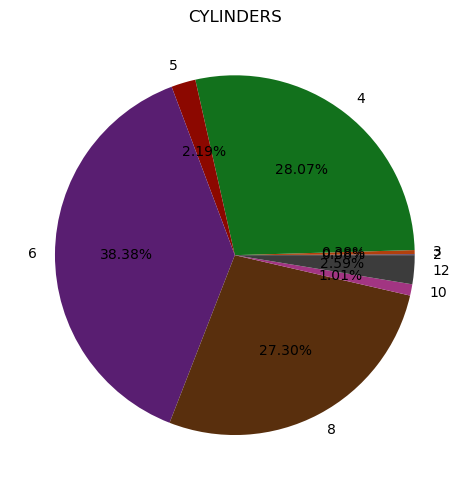

In [46]:
df_pie=df.groupby(['CYLINDERS'])['FUEL CONSUMPTION'].sum().reset_index()
data = df_pie[:10]

plt.figure(figsize=(5,5))
plt.title('CYLINDERS')
plt.pie(data['FUEL CONSUMPTION'], labels= df_pie['CYLINDERS'],autopct='%1.2f%%',)
plt.show()

In [47]:
!pip install xgboost
import xgboost as xgb
model = xgb.XGBRegressor()

Defaulting to user installation because normal site-packages is not writeable


In [48]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [49]:
from numpy import absolute
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.5f (%.5f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.06420 (0.00159)


In [50]:
X = X[:y.shape[0],:]
y = y[:x.shape[0]]
y_pred = regr.predict(X)

# plot the scatter plot and line of best fit
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Independent variable (x)')
plt.ylabel('Dependent variable (y)')
plt.show()

InvalidIndexError: (slice(None, 21347, None), slice(None, None, None))

In [ ]:
# plot the scatter plot and line of best fit
plt.scatter(data1, y_train)
plt.plot(data1, y_pred, color='red')
plt.xlabel('Independent variable (x)')
plt.ylabel('Dependent variable (y)')
plt.show()


In [ ]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(X), max(X)).reshape(-1,1)
# Fit
reg.fit(X,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(X, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='black', linewidth=3)
plt.scatter(X=X,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()